# BERT NLP - Session 2 - Sentiment Classification Using BERT

#### Problem Statement
We will use the IMDB Movie Reviews Dataset, where based on the given review we have to classify the sentiments of that particular review like positive or negative.

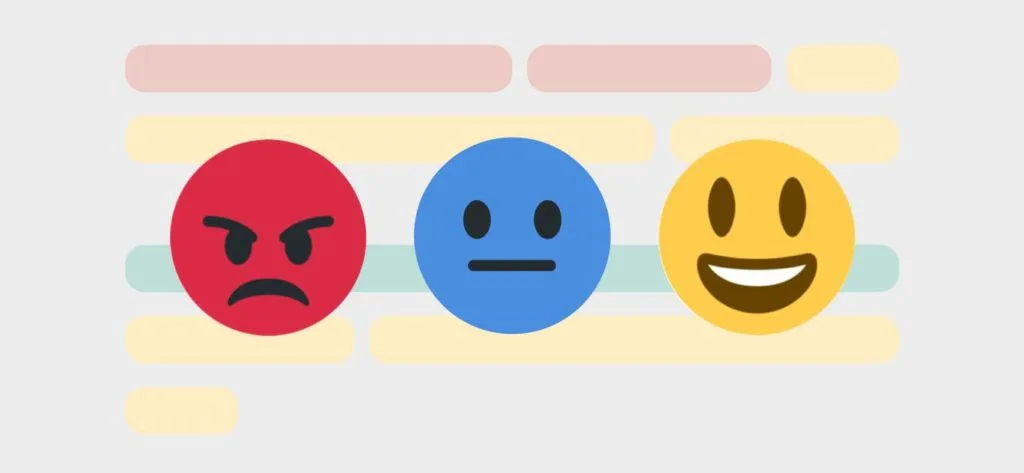

#### Introduction
Chatbots, virtual assistants, and dialog agents will typically classify queries into specific intents in order to generate the most coherent response.

Intent classification is a classification problem that predicts the intent label for any given user query. It is usually a multi-class classification problem, where the query is assigned one unique label.

For example, the query `“how much does the limousine service cost within Pune”` is labeled as `“groundfare”` while the query `“what kind of ground transportation is available in Pune”` is labeled as `“ground_service”`. The query `“I want to fly from Delhi at 8:38 am and arrive in Pune at 11:10 in the morning”` is a `“flight”` intent, while `“show me the costs and times for flights from Delhi to Pune”` is an `“airfare+flight_time”` intent.

The examples mentioned above shows how ambiguous intent labeling can be. Any addition of misleading words, causing multiple intents to be present in the same query. Attention-based learning methods were proposed for intent classification (Liu and Lane, 2016; Goo et al., 2018). One type of network built with attention is called a Transformer. It applies attention mechanisms to gather information about the relevant context of a given word, and then encode that context in a rich vector that smartly represents the word.

#### What is transformer?
Before digging into the concepts of BERT, let us understand why Transformers and why it is needed?

To understand transformers we first must understand the attention mechanism.

The Attention mechanism enables the transformers to have extremely long term memory. A transformer model can “attend” or “focus” on all previous tokens that have been generated.

Recurrent neural networks (RNN) are also capable of looking at previous inputs too. But the power of the attention mechanism is that it doesn’t suffer from short term memory. RNNs can theoretically access information arbitrarily far in the past, but in practice, they have a hard time keeping that information in their internal state (this is related to the vanishing gradient problem). This is still true for Gated Recurrent Units (GRU’s) and Long-short Term Memory (LSTM’s) networks, although they do a bigger capacity to achieve longer-term memory, therefore, having a longer window to reference from. The attention mechanism, in theory, and given enough compute resources, have an infinite window to reference from, therefore being capable of using the entire context of the story while generating the text.

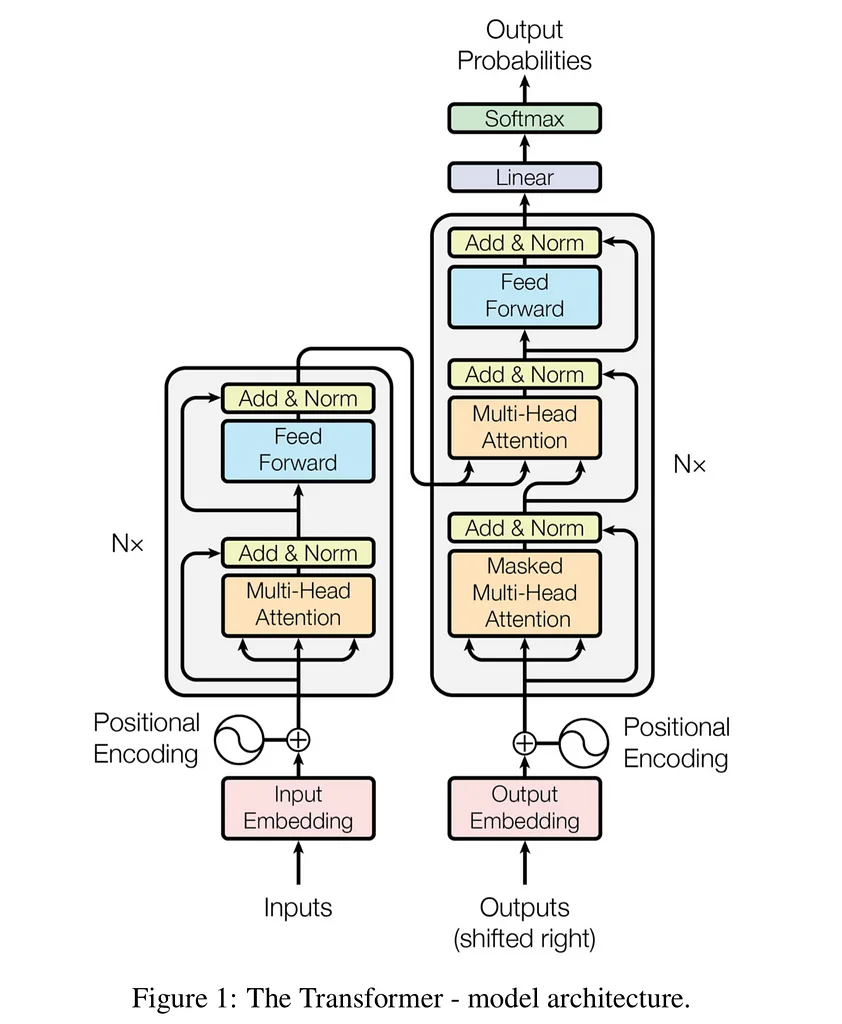

#### What is BERT
Bidirectional Encoder Representations from Transformers (BERT) is a technique for NLP (Natural Language Processing) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google. Google is leveraging BERT to better understand user searches.

BERT is designed to pre-train deep bidirectional representations from an unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications.

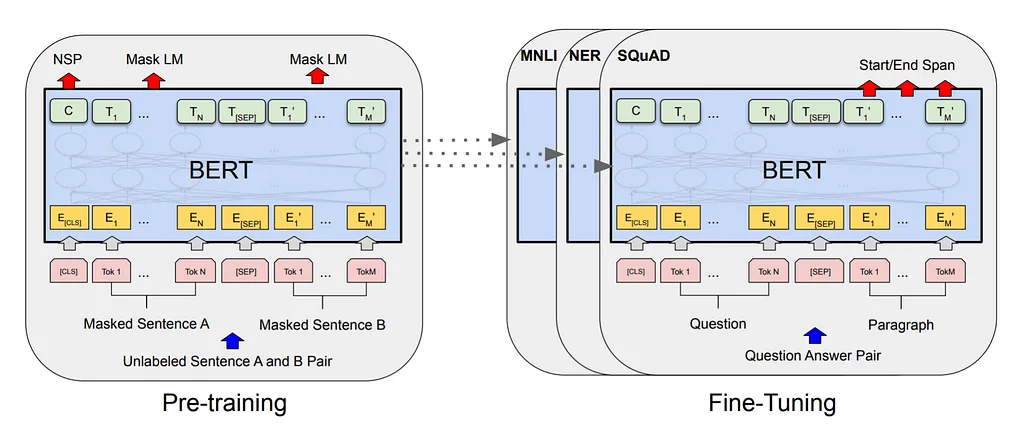

#### Key Points to Remember
 - BERT is basically a trained Transformer Encoder stack, with twelve in the Base version, and twenty-four in the Large version, compared to 6 encoder layers in the original Transformer.
 - BERT encoders have larger feedforward networks (768 and 1024 nodes in Base and Large respectively) and more attention heads (12 and 16 respectively). BERT was trained on Wikipedia and Book Corpus, a dataset containing +10,000 books of different genres.
 
Below you can see a diagram of additional variants of BERT pre-trained on specialized corpora.

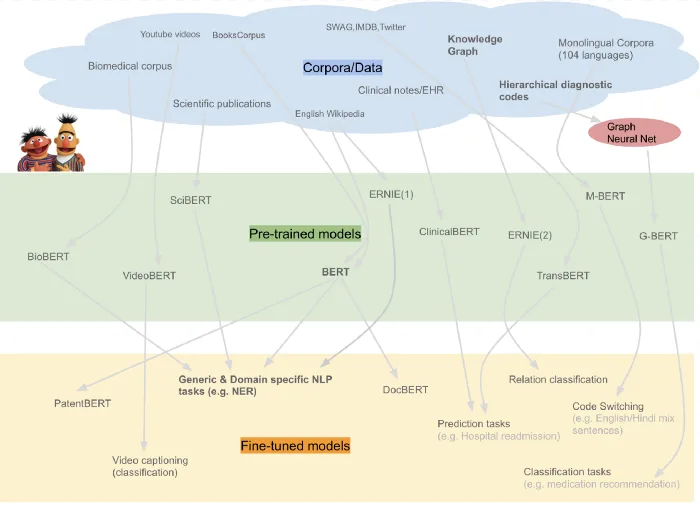

here are two existing strategies for applying pre-trained language representations to downstream tasks: feature-based and fine-tuning.

The feature-based approach, such as ELMo (Peters et al., 2018a), uses task-specific architectures that include the pre-trained representations as additional features. The fine-tuning approach, such as the Generative Pre-trained Transformer (OpenAI GPT) (Radford et al., 2018), introduces minimal task-specific parameters and is trained on the downstream tasks by simply fine-tuning all pre-trained parameters.

The two approaches share the same objective function during pre-training, where they use unidirectional language models to learn general language representations.

#### Why BERT?
Proper language representation is key for general-purpose language understanding by machines. Context-free models such as word2vec or GloVe generate a single word embedding representation for each word in the vocabulary. For example, the word “bank” would have the same representation in “bank deposit” and in “riverbank”.

Contextual models instead generate a representation of each word that is based on the other words in the sentence. BERT, as a contextual model, captures these relationships in a bidirectional way. BERT was built upon recent work and clever ideas in pre-training contextual representations including Semi-supervised Sequence Learning, Generative Pre-Training, ELMo, the OpenAI Transformer, ULMFit, and the Transformer. Although these models are all unidirectional or shallowly bidirectional, BERT is fully bidirectional.

We will use BERT to extract high-quality language features from the ATIS query text data, and fine-tune BERT on a specific task (classification) with its own data to produce a state of the art predictions.

#### What is ktrain?
ktrain is a library to help build, train, debug, and deploy neural networks in the deep learning software framework, Keras.

ktrain uses tf.keras in TensorFlow instead of standalone Keras.) Inspired by the fastai library, with only a few lines of code, ktrain allows you to easily:

estimate an optimal learning rate for your model given your data using a learning rate finder
employ learning rate schedules such as the triangular learning rate policy, 1cycle policy, and SGDR to more effectively train your model
employ fast and easy-to-use pre-canned models for both text classification (e.g., NBSVM, fastText, GRU with pre-trained word embeddings) and image classification (e.g., ResNet, Wide Residual Networks, Inception)
load and preprocess text and image data from a variety of formats
inspect data points that were misclassified to help improve your model
leverage a simple prediction API for saving and deploying both models and data-preprocessing steps to make predictions on new raw data

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [2]:
#loading the train dataset

data_train = pd.read_excel('data/IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx', dtype = str)

In [3]:
#loading the test dataset

data_test = pd.read_excel('data/IMDB-Movie-Reviews-Large-Dataset-50k/test.xlsx', dtype = str)

In [4]:
#dimension of the dataset

print("Size of train dataset: ",data_train.shape)
print("Size of test dataset: ",data_test.shape)

Size of train dataset:  (25000, 2)
Size of test dataset:  (25000, 2)


#### Observation: 
Both train and test dataset is having 25000 rows and 2 columns

In [5]:
#printing last rows of train dataset

data_train.tail()

,Reviews,Sentiment
24995,Everyone plays their part pretty well in this ...,pos
24996,It happened with Assault on Prescient 13 in 20...,neg
24997,My God. This movie was awful. I can't complain...,neg
24998,"When I first popped in Happy Birthday to Me, I...",neg
24999,"So why does this show suck? Unfortunately, tha...",neg


In [6]:
#printing head rows of test dataset

data_test.head()

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg


#### Splitting data into Train and Test:

In [7]:
# text.texts_from_df return two tuples
# maxlen means it is considering that much words and rest are getting trucated
# preprocess_mode means tokenizing, embedding and transformation of text corpus(here it is considering BERT model)


(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=data_train,
                                                                   text_column = 'Reviews',
                                                                   label_columns = 'Sentiment',
                                                                   val_df = data_test,
                                                                   maxlen = 500,
                                                                   preprocess_mode = 'bert')


downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


#### Observation:

 - You can able to see that it is detecting language as an English
 - Also, this is not a multilabel classification


In [8]:
# name = "bert" means, here we are using BERT model.

model = text.text_classifier(name = 'bert',
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 500
done.


In [9]:
#here we have taken batch size as 6 as from the documentation it is recommend to use this with maxlen as 500

learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

In [ ]:
# find out best learning rate?
# learner.lr_find()
# learner.lr_plot()

# it may take days or many days to find out.

In [ ]:
#Essentially fit is a very basic training loop, whereas fit one cycle uses the one cycle policy callback

learner.fit_onecycle(lr = 2e-5, epochs = 1)

predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
#sample dataset to test on

data = ['this movie was horrible, the plot was really boring. acting was okay',
        'the fild is really sucked. there is not plot and acting was bad',
        'what a beautiful movie. great plot. acting was good. will see it again']

In [ ]:
predictor.predict(data)

#### Intepretation of above results :

 - `this movie was horrible, the plot was really boring. acting was okay` – neg
 - `the fild is really sucked. there is not plot and acting was bad` – neg
 - `what a beautiful movie. great plot. acting was good. will see it again` – pos


In [ ]:
#return_proba = True means it will give the prediction probabilty for each class

predictor.predict(data, return_proba=True)

In [ ]:
#classes available

predictor.get_classes()

#### Summary
 - First, We have loaded the pre-loaded the dataset and process it using the pandas dataframe.
 - Thereafter we have used pre-trained model weights of BERT on our dataset using kTrain library.
 - Then, we have found the best learning parameter and using that we have fit the model.
 - Finally, using that model we have predicted our output.

Note : For better performance you can distilBERT that is one variant of BERT only.